<a href="https://colab.research.google.com/github/Muhammadwaqas77/take-no1/blob/main/Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


🔹 Logistic Regression
              precision    recall  f1-score   support

           0       0.48      0.50      0.49       195
           1       0.51      0.50      0.50       205

    accuracy                           0.50       400
   macro avg       0.50      0.50      0.50       400
weighted avg       0.50      0.50      0.50       400

ROC-AUC Score: 0.4659

🔹 Decision Tree
              precision    recall  f1-score   support

           0       0.47      0.77      0.58       195
           1       0.44      0.18      0.25       205

    accuracy                           0.47       400
   macro avg       0.46      0.47      0.42       400
weighted avg       0.46      0.47      0.41       400

ROC-AUC Score: 0.4564

🔹 Random Forest
              precision    recall  f1-score   support

           0       0.49      0.58      0.53       195
           1       0.52      0.43      0.47       205

    accuracy                           0.51       400
   macro avg       0.51    

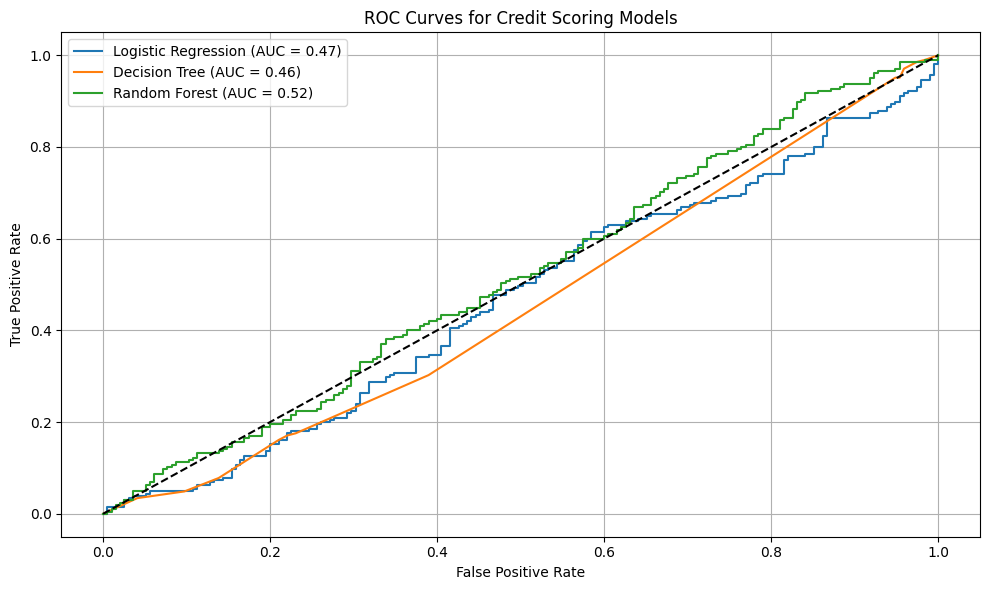

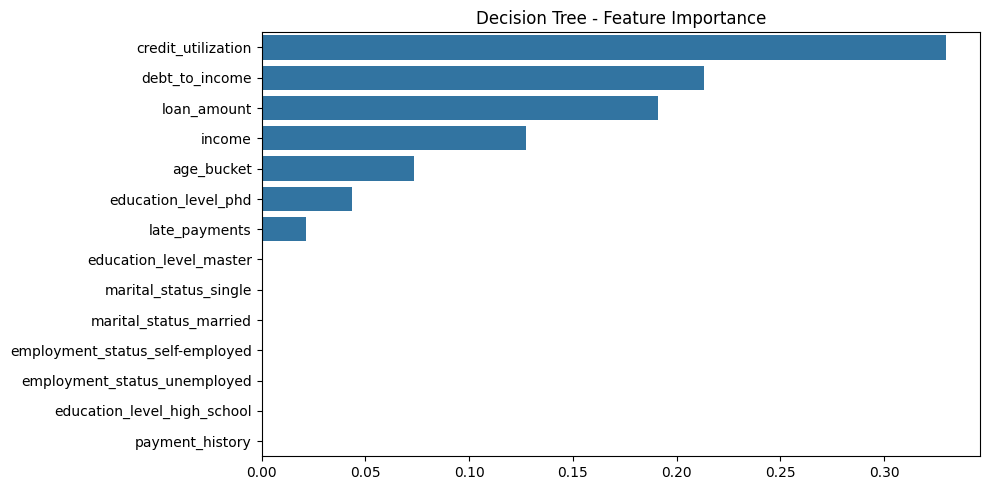

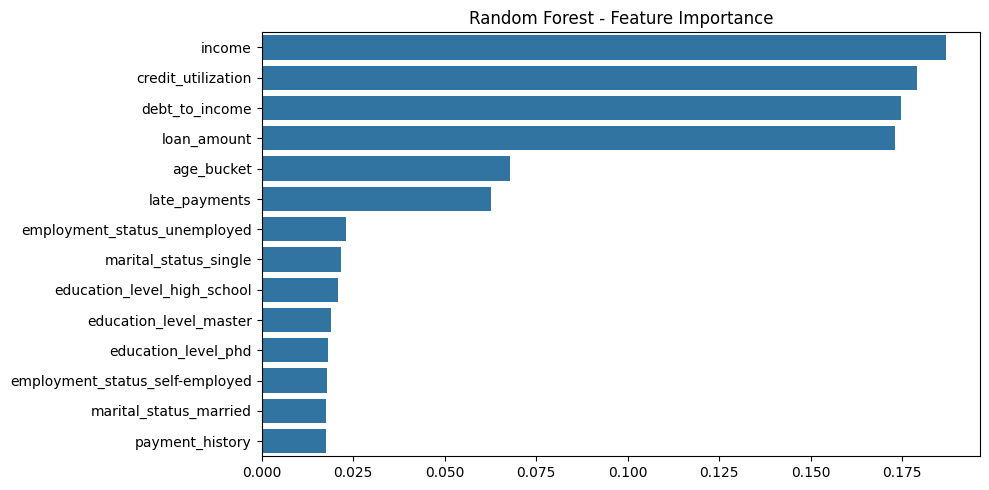

In [ ]:
# IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# 1. GENERATE SIMULATED DATA
np.random.seed(42)
n_samples = 2000

data = pd.DataFrame({
    'age': np.random.randint(21, 70, n_samples),
    'income': np.random.normal(50000, 15000, n_samples),
    'loan_amount': np.random.normal(15000, 5000, n_samples),
    'employment_status': np.random.choice(['employed', 'unemployed', 'self-employed'], n_samples),
    'payment_history': np.random.randint(0, 2, n_samples),
    'late_payments': np.random.randint(0, 6, n_samples),
    'credit_utilization': np.random.uniform(0.0, 1.0, n_samples),
    'education_level': np.random.choice(['high_school', 'bachelor', 'master', 'phd'], n_samples),
    'marital_status': np.random.choice(['single', 'married', 'divorced'], n_samples),
    'default': np.random.randint(0, 2, n_samples)
})

# 2. INTRODUCE MISSING VALUES
data.loc[np.random.choice(data.index, 50), 'income'] = np.nan
data.loc[np.random.choice(data.index, 30), 'education_level'] = np.nan

# 3. IMPUTATION
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Impute numerical column
data['income'] = num_imputer.fit_transform(data[['income']])

# Impute categorical column (FIXED)
data['education_level'] = cat_imputer.fit_transform(data[['education_level']]).ravel()

# 4. ENCODING CATEGORICAL VARIABLES
categorical_cols = ['employment_status', 'education_level', 'marital_status']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# 5. FEATURE ENGINEERING
data['debt_to_income'] = data['loan_amount'] / (data['income'] + 1)
data['age_bucket'] = pd.cut(data['age'], bins=[20, 30, 40, 50, 60, 70], labels=False)
data.drop(columns=['age'], inplace=True)

# 6. SPLIT INTO FEATURES & TARGET
X = data.drop(columns=['default'])
y = data['default']

# 7. SPLIT INTO TRAIN & TEST SETS
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8. SCALING
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 9. DEFINE MODELS
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(max_depth=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=7)
}

# 10. TRAIN & EVALUATE MODELS
plt.figure(figsize=(10, 6))
for name, model in models.items():
    print(f"\n🔹 {name}")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    print(classification_report(y_test, y_pred))
    auc = roc_auc_score(y_test, y_proba)
    print(f"ROC-AUC Score: {auc:.4f}")

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

# 11. PLOT ROC CURVES
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curves for Credit Scoring Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 12. FEATURE IMPORTANCE FOR TREE MODELS
def plot_feature_importance(model, model_name, feature_names):
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        plt.figure(figsize=(10, 5))
        plt.title(f"{model_name} - Feature Importance")
        sns.barplot(x=importances[indices], y=np.array(feature_names)[indices])
        plt.tight_layout()
        plt.show()

# Use only tree-based models for feature importance
for name, model in models.items():
    if name != 'Logistic Regression':
        plot_feature_importance(model, name, X.columns)